In [1]:
!nvidia-smi

Tue Dec 13 10:02:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    26W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Setup environment

In [2]:
# install dependents
!pip install -q monailabel-weekly
!pip install -q monai
!pip uninstall opencv-contrib-python -y
!pip install opencv-python==4.1.2.30 opencv-contrib-python==4.1.2.30
!pip install -q timm
!pip install -U -q openmim
!mim install -U -q mmcv-full
!pip install -q ml_collections

     |████████████████████████████████| 9.3 MB 8.0 MB/s 
     |████████████████████████████████| 2.0 MB 52.7 MB/s 
     |████████████████████████████████| 62 kB 537 kB/s 
     |████████████████████████████████| 1.6 MB 46.4 MB/s 
     |████████████████████████████████| 1.2 MB 23.7 MB/s 
     |████████████████████████████████| 57 kB 2.0 MB/s 
     |████████████████████████████████| 51 kB 149 kB/s 
     |████████████████████████████████| 54 kB 1.6 MB/s 
     |████████████████████████████████| 2.1 MB 4.9 MB/s 
     |████████████████████████████████| 108 kB 50.7 MB/s 
     |████████████████████████████████| 47.8 MB 60 kB/s 
     |████████████████████████████████| 41 kB 223 kB/s 
     |████████████████████████████████| 54 kB 1.4 MB/s 
     |████████████████████████████████| 525 kB 55.0 MB/s 
     |████████████████████████████████| 77 kB 1.6 MB/s 
     |████████████████████████████████| 62 kB 211 kB/s 
     |████████████████████████████████| 84 kB 4.3 MB/s 
     |█████████████████████████████

In [3]:
# mount driver
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CardiacSeg/UNETCNX/CHGH


# sync python module
%load_ext autoreload
%autoreload 2

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1jz_DGnICBmKWCr_JL904PDQdIEK0_EQG/CardiacSeg/UNETCNX/CHGH


## Infer

In [11]:
import sys
# set package path
sys.path.append("/content/drive/MyDrive/CardiacSeg")

import os
from pathlib import PurePath
import pandas as pd

from monai.transforms import (
   Compose,
   AddChanneld,
   EnsureChannelFirstd,
   LoadImaged,
   Orientationd,
   SqueezeDimd,
   LoadImage
)

from data_utils.chgh_dataset import get_data_dicts
from data_utils.utils import get_pid_by_file
from data_utils.visualization import show_img_lbl, show_img_lbl_pred, show_img_lbl_preds, show_img_lbl_preds_overlap


exp_name = 'exp_2_2_x0'
root_dir = '/content/drive/MyDrive/CardiacSeg/UNETCNX/CHGH'

model_name = 'unetcnx_x0'
dataset_name = 'dataset_2'
data_dir = f'/content/drive/MyDrive/CardiacSeg/dataset/CHGH/{dataset_name}'
model_dir = os.path.join(root_dir, 'models', exp_name)
infer_dir = os.path.join(root_dir, 'infers', exp_name) # os.path.join(root_dir, 'infers', f'{exp_name}_overlap_8')
best_checkpoint = os.path.join(model_dir, 'best_model.pth')
#data_dicts_json = os.path.join(root_dir, 'data_dicts', f'{exp_name}.json')

if exp_name.find('exp_0') != -1:
  test_idx_dict = {'108':-2, '110':-1}
elif exp_name.find('exp_1') != -1:
  test_idx_dict = {'106':4, '108':6, '110':7, '1000':-2}
elif exp_name.find('exp_2') != -1:
  test_idx_dict = {'106':2, '1000':-3}

idx = test_idx_dict['1000']
data_dict = get_data_dicts(data_dir)[idx]
img_pth = data_dict['image']
lbl_pth = data_dict['label'] 
data_dict['pred'] = os.path.join(infer_dir, PurePath(img_pth).parts[-1])
print(img_pth)
print(lbl_pth)
print(data_dict['pred'])

/content/drive/MyDrive/CardiacSeg/dataset/CHGH/dataset_2/pid_1000/pid_1000.nii.gz
/content/drive/MyDrive/CardiacSeg/dataset/CHGH/dataset_2/pid_1000/pid_1000_gt.nii.gz
/content/drive/MyDrive/CardiacSeg/SwinUNETR/CHGH/infers/exp_2_2/pid_1000.nii.gz


In [12]:
!python /content/drive/MyDrive/CardiacSeg/expers/chgh/infer.py \
--model_name={model_name} \
--data_dir={data_dir} \
--model_dir={model_dir} \
--infer_dir={infer_dir} \
--checkpoint={best_checkpoint} \
--img_pth={img_pth} \
--lbl_pth={lbl_pth} \
#--infer_overlap=0.25

2022-12-13 10:14:46,825 - Generating grammar tables from /usr/lib/python3.8/lib2to3/Grammar.txt
2022-12-13 10:14:46,842 - Generating grammar tables from /usr/lib/python3.8/lib2to3/PatternGrammar.txt
On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
cuda is available
model: swinunetr
=> loaded checkpoint '/content/drive/MyDrive/CardiacSeg/SwinUNETR/CHGH/models/exp_2_2/best_model.pth')
infer data: {'image': '/content/drive/MyDrive/CardiacSeg/dataset/CHGH/dataset_2/pid_1000/pid_1000.nii.gz', 'label': '/content/drive/MyDrive/CardiacSeg/dataset/CHGH/dataset_2/pid_1000/pid_1000_gt.nii.gz'}
<class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaT

# Show exp results

In [13]:
def get_data_path(pid, data_dir, test_idx_dict):
    idx = test_idx_dict[pid]
    data_dict = get_data_dicts(data_dir)[idx]
    return data_dict


def get_pred_path(exp_name, root_dir, img_pth):
    infer_dir = os.path.join(root_dir, 'infers', exp_name)
    return os.path.join(infer_dir, PurePath(img_pth).parts[-1])

def get_eval_csv_path(exp_name, root_dir):
    eval_dir = os.path.join(root_dir, 'evals', exp_name)
    return os.path.join(eval_dir, 'best_model_eval.csv')

def get_dice_val(csv_pth, pid):
    df = pd.read_csv(csv_pth)
    idx = df['patientId'] == f'pid_{pid}'
    return df[idx]['dice'].tolist()[0]
    

def get_slice(img, slice_idx, mode, is_trans):
    '''
    mode: a, c, s
    '''
    if mode == 'a':
      img = img[:, :, slice_idx]
    elif mode == 's':
      img = img[:, slice_idx, :]
    else:
      img = img[slice_idx, :, :]
    
    if is_trans:
      return img.T
    else:
      return img


def get_img_lbl_preds(data, exp_names, slice_idxs, mode='a', is_trans=False):
    '''
    mode: a, c, s
    '''
    preds = []
    imgs = []
    lbls = []
    for slice_idx in slice_idxs:
        pred_ls = []
        for exp_name in exp_names:
          pred_ls.append(get_slice(data[exp_name], slice_idx, mode, is_trans))
        preds.append(pred_ls)
        imgs.append(get_slice(data['image'], slice_idx, mode, is_trans))
        lbls.append(get_slice(data['label'], slice_idx, mode, is_trans))
    return imgs, lbls, preds

In [17]:
from pprint import pprint

root_dir = '/content/drive/MyDrive/CardiacSeg/UNETCNX/CHGH'
swinunetr_dir = '/content/drive/MyDrive/CardiacSeg/SwinUNETR/CHGH'
unet3d_dir = '/content/drive/MyDrive/CardiacSeg/UNet3D/CHGH'
#exp_names = ['exp_0', 'exp_1', 'exp_1_1']
exp_names = ['exp_2_2', 'exp_2_2', 'exp_2_2_p', 'exp_2_2_x0'] #['exp_1_2', 'exp_2_1', 'exp_2_2', 'exp_2_2_x0', 'exp_2_2']
model_names = ['unet3d', 'swinunetr', 'swinunetr', 'unetcnx'] #['unetcnx', 'unetcnx', 'unetcnx', 'unetcnx', 'swinunetr']
dirs = [unet3d_dir, swinunetr_dir, swinunetr_dir, root_dir]
pid = '1000'

data_dict = get_data_path(pid, data_dir, test_idx_dict)
dice_dict = {}
for exp_name, model_name, dir in zip(exp_names, model_names, dirs):
    key = f'{model_name}_{exp_name}'
    data_dict[key] = get_pred_path(exp_name, dir, data_dict['image'])

    # read dice by pid
    csv_pth = get_eval_csv_path(exp_name, dir)
    dice_dict[key] = get_dice_val(csv_pth, pid)


pprint(data_dict)
pprint(dice_dict)

{'image': '/content/drive/MyDrive/CardiacSeg/dataset/CHGH/dataset_2/pid_1000/pid_1000.nii.gz',
 'label': '/content/drive/MyDrive/CardiacSeg/dataset/CHGH/dataset_2/pid_1000/pid_1000_gt.nii.gz',
 'swinunetr_exp_2_2': '/content/drive/MyDrive/CardiacSeg/SwinUNETR/CHGH/infers/exp_2_2/pid_1000.nii.gz',
 'swinunetr_exp_2_2_p': '/content/drive/MyDrive/CardiacSeg/SwinUNETR/CHGH/infers/exp_2_2_p/pid_1000.nii.gz',
 'unet3d_exp_2_2': '/content/drive/MyDrive/CardiacSeg/UNet3D/CHGH/infers/exp_2_2/pid_1000.nii.gz',
 'unetcnx_exp_2_2_x0': '/content/drive/MyDrive/CardiacSeg/UNETCNX/CHGH/infers/exp_2_2_x0/pid_1000.nii.gz'}
{'swinunetr_exp_2_2': 0.8893833,
 'swinunetr_exp_2_2_p': 0.89890987,
 'unet3d_exp_2_2': 0.84654504,
 'unetcnx_exp_2_2_x0': 0.8977148}


In [18]:
keys = list(data_dict.keys())

loader = Compose([
    LoadImaged(keys=keys),
    EnsureChannelFirstd(keys=keys),
    Orientationd(keys=keys, axcodes='PLI'),
    SqueezeDimd(keys=keys)
])

data = loader(data_dict)

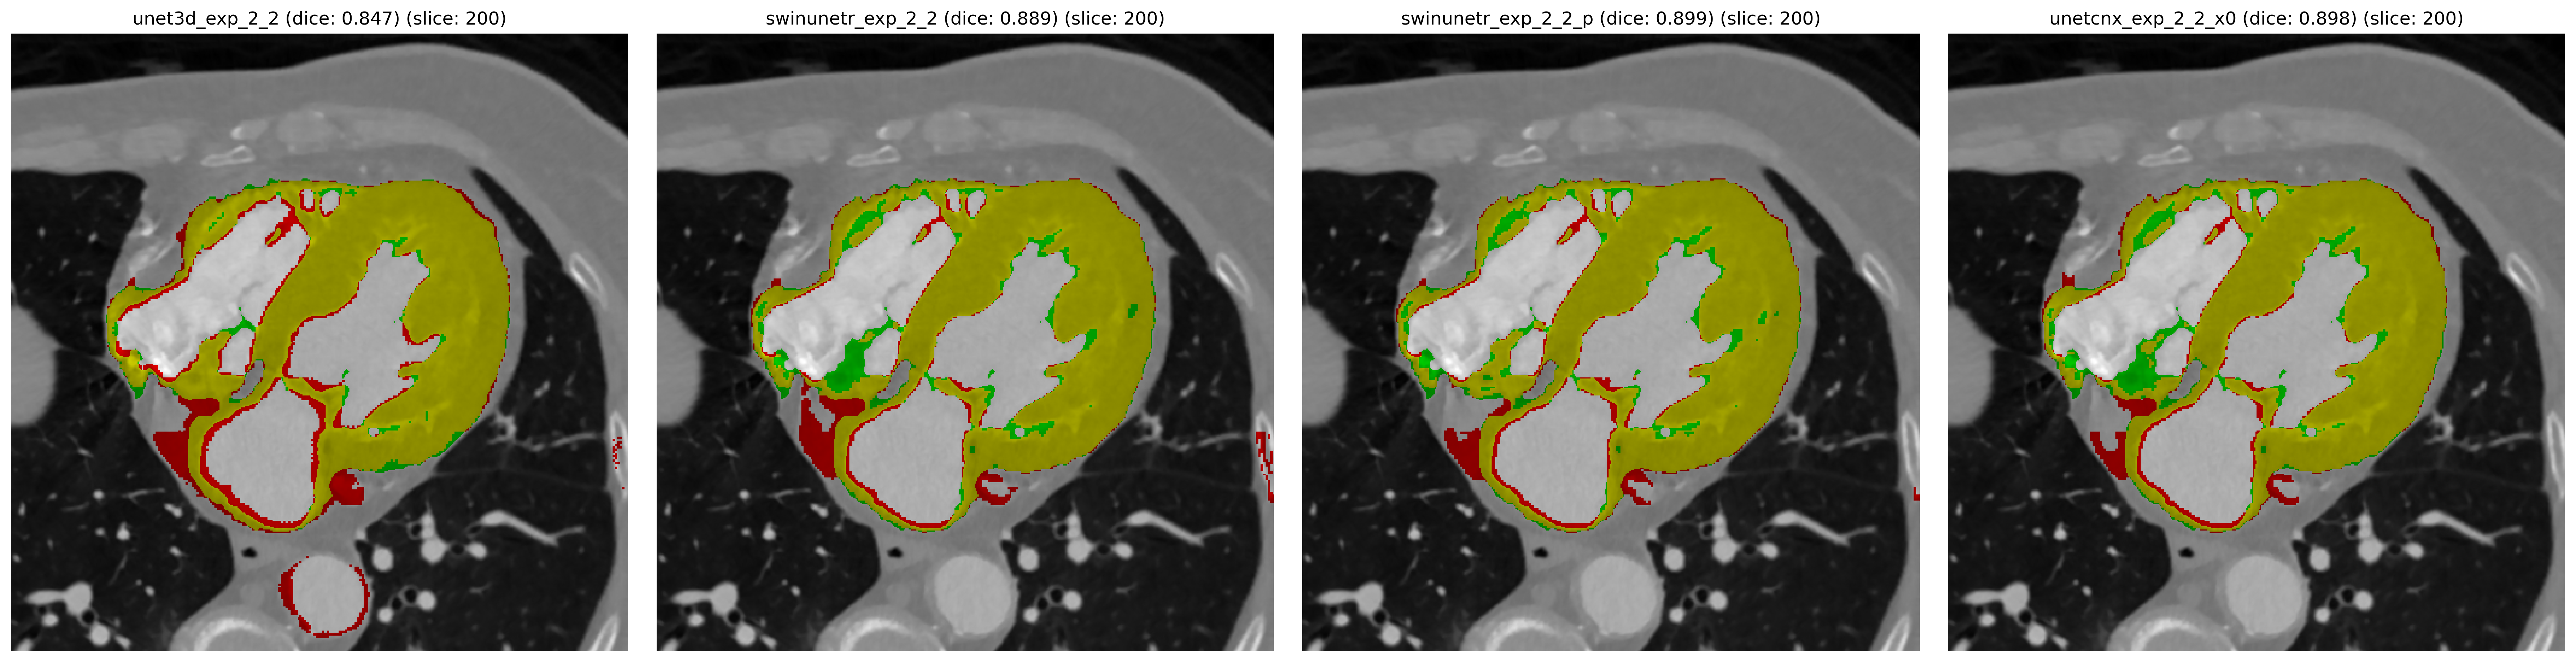

In [19]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

num_classes = 2
slice_idxs = [200] #[100,150,200,250]
alpha = 0.5
axis_off = True
#num_img = len(data_dict)
#fig_size = (num_img*5, num_img*len(slice_idxs))
num_img = len(data_dict) - 2 
fig_size = (num_img*6, len(slice_idxs)*6)
show_img = False
show_lbl_dc = True

keys = dice_dict.keys()

pred_titles = [f'{key} (dice: {dice_dict[key]:.3f})'for key in keys]

imgs, lbls, preds = get_img_lbl_preds(data, keys, slice_idxs, mode='a')

# show_img_lbl_preds
show_img_lbl_preds_overlap(
    imgs,
    lbls,
    preds,
    pred_titles,
    slice_idxs,
    num_classes,
    axis_off,
    alpha,
    fig_size,
    show_img, 
    show_lbl_dc
)

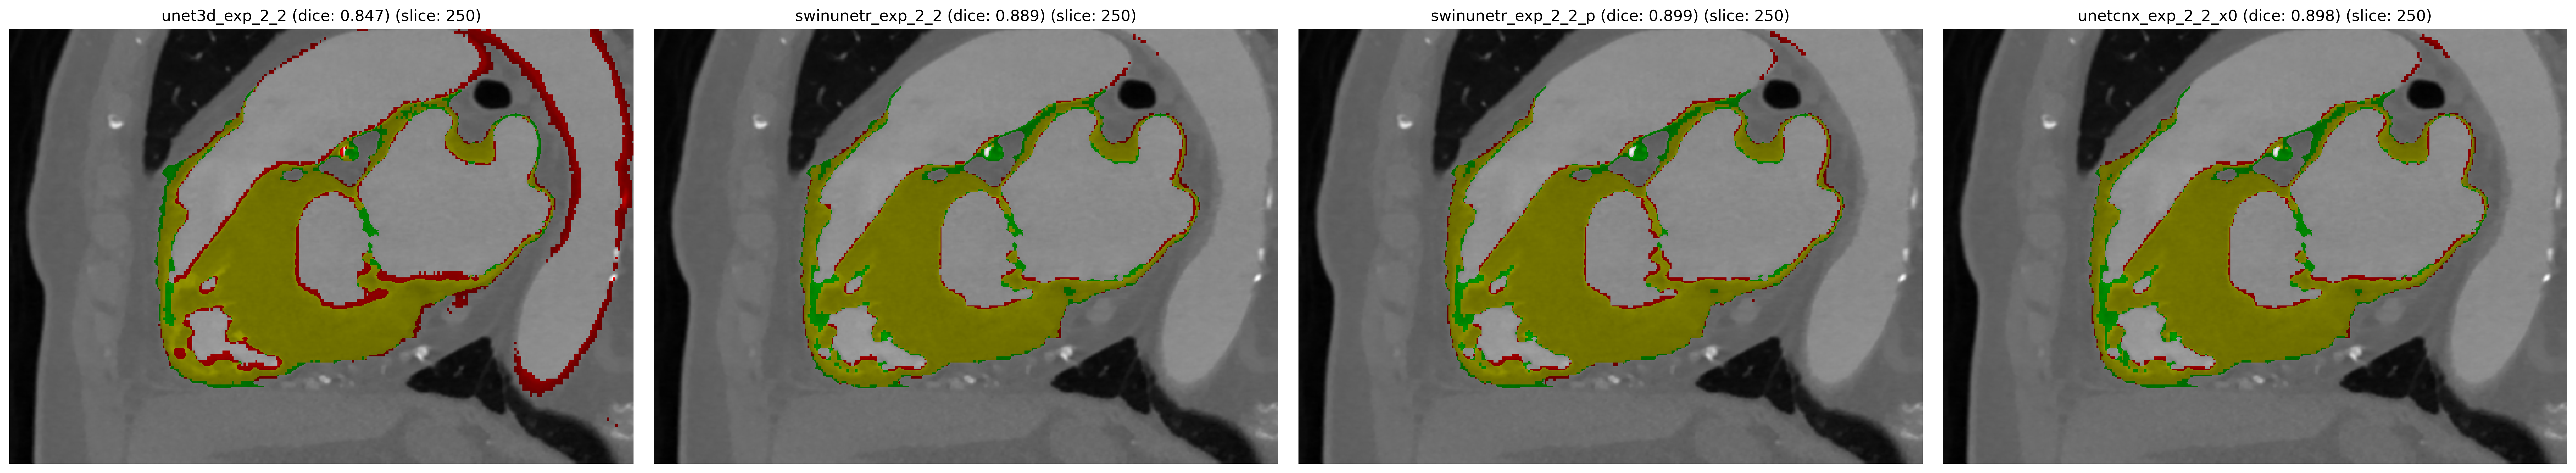

In [20]:
slice_idxs = [250] #[150,250,350]
fig_size = (num_img*7, len(slice_idxs)*5)

imgs, lbls, preds = get_img_lbl_preds(data, keys, slice_idxs, mode='s', is_trans=True)

#show_img_lbl_preds
show_img_lbl_preds_overlap(
    imgs,
    lbls,
    preds,
    pred_titles,
    slice_idxs,
    num_classes,
    axis_off,
    alpha,
    fig_size,
    show_img, 
    show_lbl_dc
)

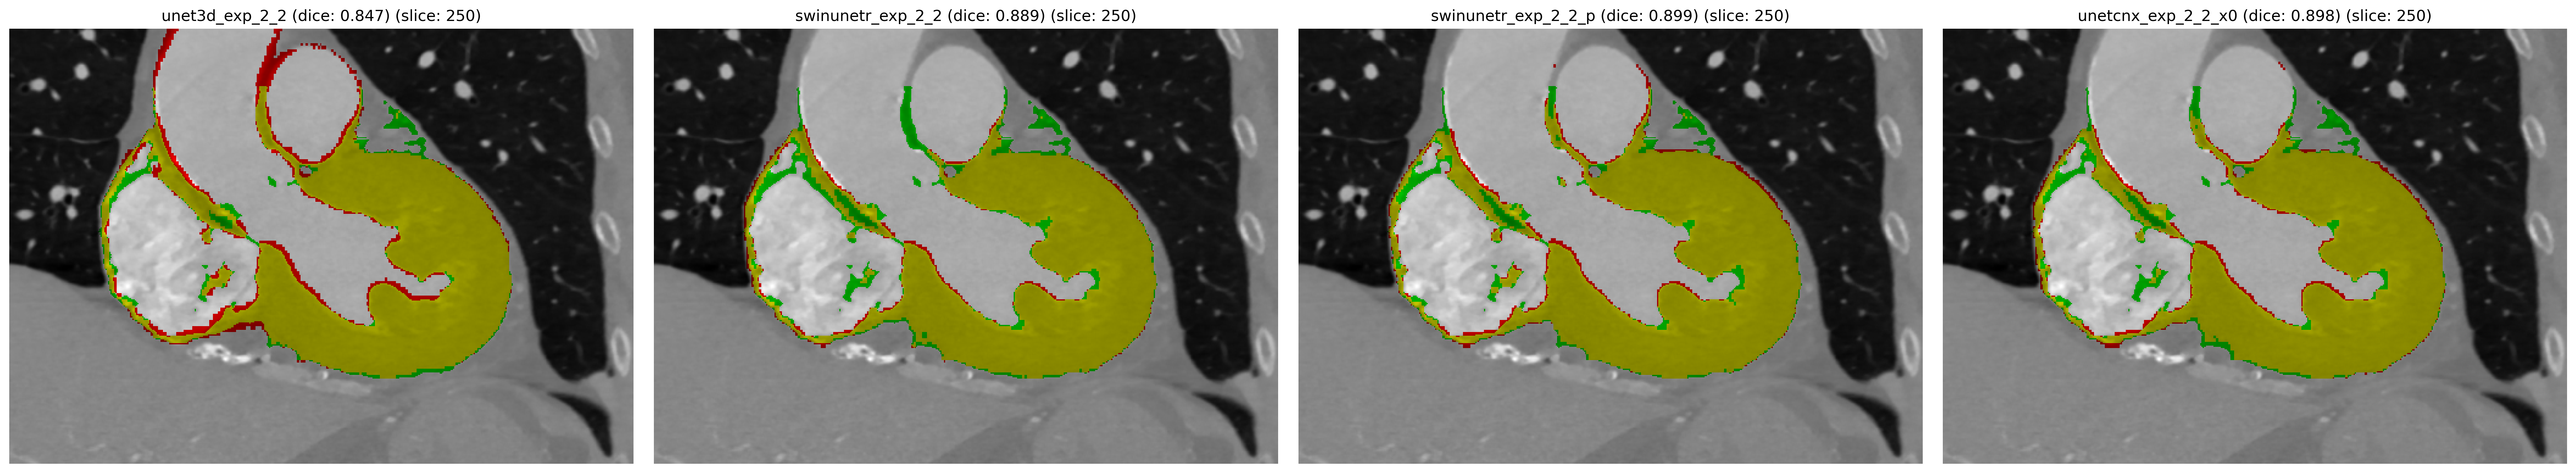

In [21]:
slice_idxs = [250] # [200,250,350]
fig_size = (num_img*7, len(slice_idxs)*5)

imgs, lbls, preds = get_img_lbl_preds(data, keys, slice_idxs, mode='c', is_trans=True)

#show_img_lbl_preds
show_img_lbl_preds_overlap(
    imgs,
    lbls,
    preds,
    pred_titles,
    slice_idxs,
    num_classes,
    axis_off,
    alpha,
    fig_size,
    show_img, 
    show_lbl_dc
)